## important imports

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np

import os
import sys

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from LoadRealRunningJumping import *
from LoadSyntheticRunningJumping import *

from GANModels import *

from dataLoader import *

import torch.fft as fft

from EvaluationFunctions import DagharUniclassEvaluation

from sklearn.manifold import TSNE


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:55: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


## Evaluating daghar models

class name : KuHar_Multiclass
Data path is located in: ../DAGHAR_split_25_10/train/data/KuHar_DAGHAR_Multiclass.csv
Models path is located in: ../pre-trained-models/daghar_split_dataset_50000_30_100/KuHar_DAGHAR_Multiclass_50000_D_30_2024_10_25_02_42_43/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:


return single class data and labels, class is KuHar_Multiclass
data shape is (2784, 3, 1, 30)
label shape is (2784,)

 Synthetic Set:
Checkpoint epochs: 288


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp = torch.load(path,  map_location=torch.device('c

(2784, 3, 1, 30)
(2784, 1)


/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(data), np.array(label_data)
/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data), np.array(label_data)


{'Time': '0.81165 ± 0.00000', 'Frequency': '0.81073 ± 0.00000'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/KuHar_Multiclass_30_50000/


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where 

Checkpoint epochs: 288
(2784, 3, 1, 30)
(2784, 1)


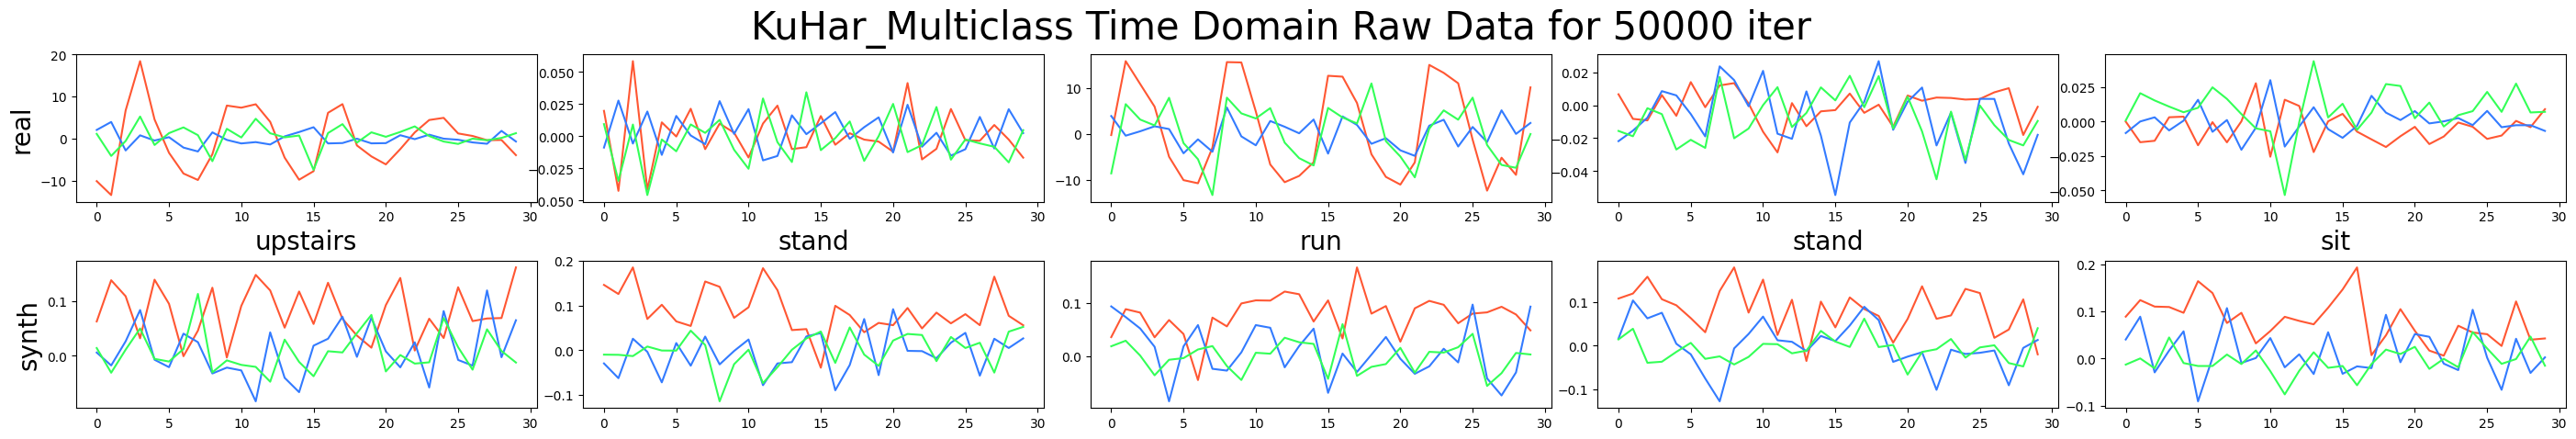

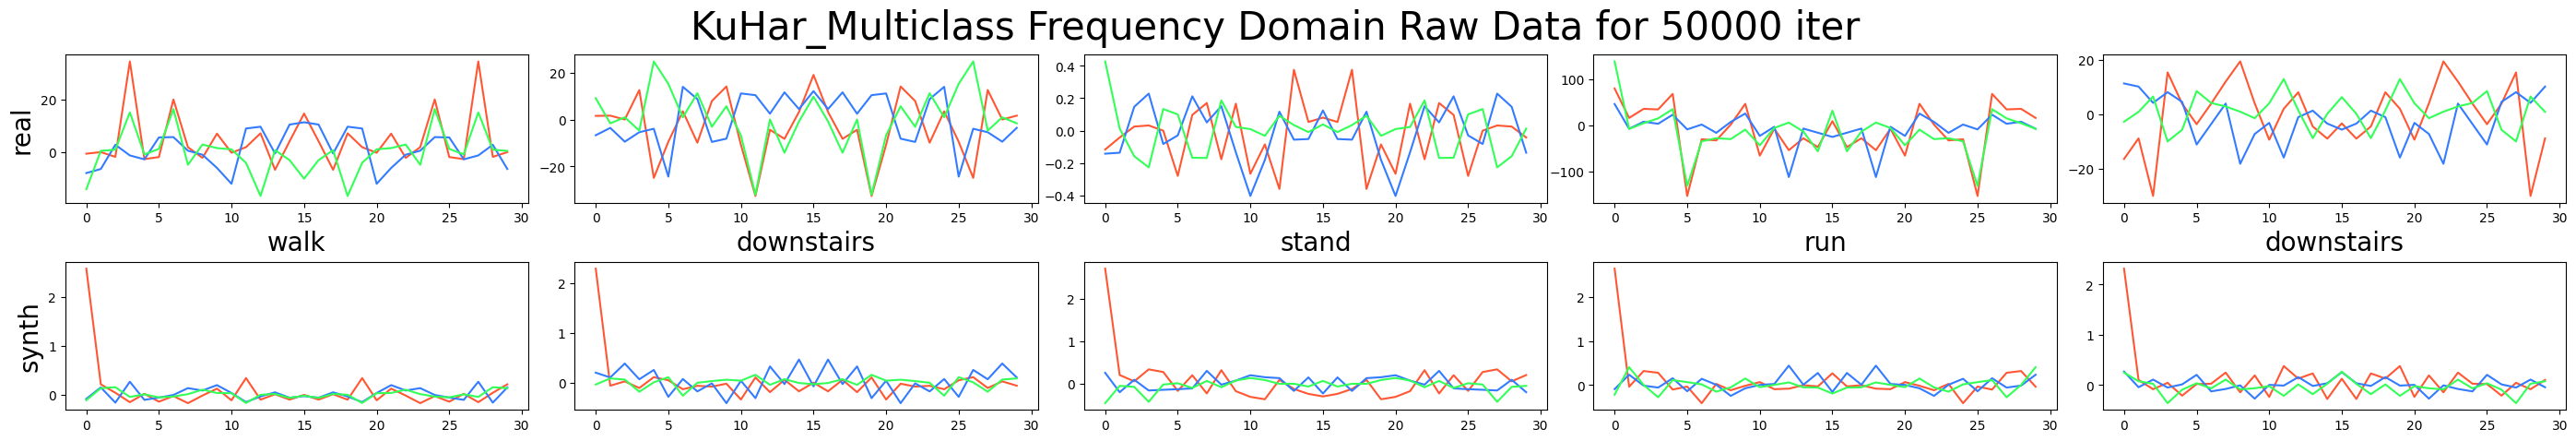

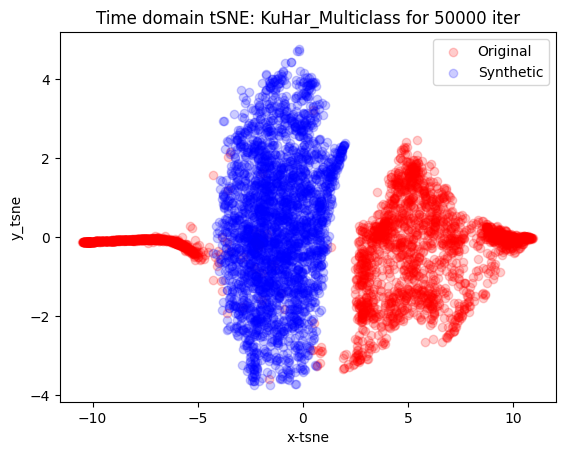

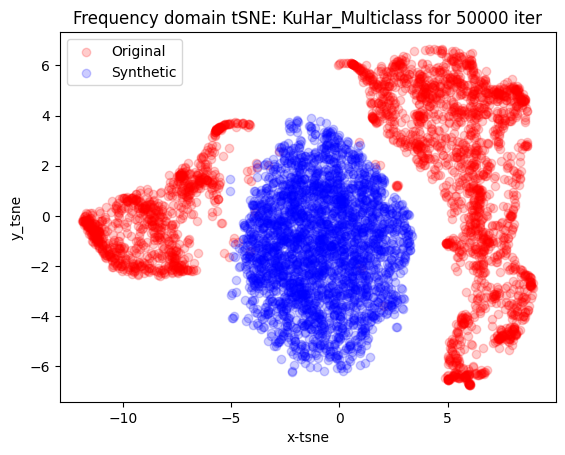

In [2]:
eval = DagharUniclassEvaluation(data_path='../DAGHAR_split_25_10/train/data/KuHar_DAGHAR_Multiclass.csv',
                                label_path='../DAGHAR_split_25_10/train/label/KuHar_Label_Multiclass.csv',
                                models_path='../pre-trained-models/daghar_split_dataset_50000_30_100/KuHar_DAGHAR_Multiclass_50000_D_30_2024_10_25_02_42_43/Model/',
                                class_name='KuHar_Multiclass',
                                seq_len=30,
                                show=True,
                                iter = 50000,
                                sample_size='all',
                                channels=3,
                                n=1)

In [6]:
eval = DagharUniclassEvaluation(data_path='../DAGHAR_split_25_10/train/data/RealWorld_thigh_DAGHAR_Multiclass.csv',
                                label_path='../DAGHAR_split_25_10/train/label/RealWorld_thigh_Label_Multiclass.csv',
                                models_path='../pre-trained-models/daghar_split_dataset_50000_30_100/RealWorld_thigh_DAGHAR_Multiclass_50000_D_30_2024_10_25_00_33_27/Model',
                                class_name='RealWorld_thigh_Multiclass',
                                seq_len=30,
                                show=True,
                                iter = 50000,
                                sample_size='all',
                                channels=3,
                                n=1)

class name : RealWorld_thigh_Multiclass
Data path is located in: ../DAGHAR_split_25_10/train/data/RealWorld_thigh_DAGHAR_Multiclass.csv
Models path is located in: ../pre-trained-models/daghar_split_dataset_50000_30_100/RealWorld_thigh_DAGHAR_Multiclass_50000_D_30_2024_10_25_00_33_27/Model
dataset: Daghar
 
 Starting evaluation
Original Set:


MemoryError: 

In [3]:
import re

# Função para converter até o primeiro número
def convert_string(s):
    # Encontrar a parte da string antes do primeiro número
    match = re.match(r'([^\d]+)(\d+)', s)
    if match:
        # Extrair a parte antes e o número
        prefix = match.group(1).lower()  # Parte antes do número, convertida para minúsculas
        number = match.group(2)          # Primeiro número encontrado
        return f"{prefix}{number}"       # Retorna no formato desejado
    return s  # Retorna a string original se não houver números

models_path = '../pre-trained-models/daghar_split_dataset_50000_30_100/'
data_path = '../DAGHAR_split_25_10/train/'
directorys = os.listdir(models_path)

first_parts = [convert_string(s) for s in directorys]
class_names = [item.split("Multiclass")[0] + "Multiclass" for item in directorys]
label_paths = [s.replace('DAGHAR', 'Label') for s in class_names] 
directorys, class_names, first_parts, label_paths

(['MotionSense_DAGHAR_Multiclass_50000_D_30_2024_10_25_00_00_24',
  'UCI_DAGHAR_Multiclass_50000_D_30_2024_10_25_01_37_21',
  'WISDM_DAGHAR_Multiclass_50000_D_30_2024_10_25_01_05_31',
  'RealWorld_thigh_DAGHAR_Multiclass_50000_D_30_2024_10_25_00_33_27',
  'RealWorld_waist_DAGHAR_Multiclass_50000_D_30_2024_10_25_02_11_06',
  'KuHar_DAGHAR_Multiclass_50000_D_30_2024_10_25_02_42_43'],
 ['MotionSense_DAGHAR_Multiclass',
  'UCI_DAGHAR_Multiclass',
  'WISDM_DAGHAR_Multiclass',
  'RealWorld_thigh_DAGHAR_Multiclass',
  'RealWorld_waist_DAGHAR_Multiclass',
  'KuHar_DAGHAR_Multiclass'],
 ['motionsense_daghar_multiclass_50000',
  'uci_daghar_multiclass_50000',
  'wisdm_daghar_multiclass_50000',
  'realworld_thigh_daghar_multiclass_50000',
  'realworld_waist_daghar_multiclass_50000',
  'kuhar_daghar_multiclass_50000'],
 ['MotionSense_Label_Multiclass',
  'UCI_Label_Multiclass',
  'WISDM_Label_Multiclass',
  'RealWorld_thigh_Label_Multiclass',
  'RealWorld_waist_Label_Multiclass',
  'KuHar_Label_Mu

class name : MotionSense_DAGHAR_Multiclass
Data path is located in: ../DAGHAR_split_25_10/train/data/MotionSense_DAGHAR_Multiclass.csv
Models path is located in: ../pre-trained-models/daghar_split_dataset_50000_30_100/MotionSense_DAGHAR_Multiclass_50000_D_30_2024_10_25_00_00_24/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is MotionSense_DAGHAR_Multiclass
data shape is (7116, 3, 1, 30)
label shape is (7116,)

 Synthetic Set:
Checkpoint epochs: 113
(7116, 3, 1, 30)
(7116, 1)


/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(data), np.array(label_data)
/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data), np.array(label_data)


{'Time': '0.99596 ± 0.00000', 'Frequency': '0.83685 ± 0.00000'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/MotionSense_DAGHAR_Multiclass_30_50000/


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where 

Checkpoint epochs: 113
(7116, 3, 1, 30)
(7116, 1)
-----------------------------------------------------------------------------
class name : UCI_DAGHAR_Multiclass
Data path is located in: ../DAGHAR_split_25_10/train/data/UCI_DAGHAR_Multiclass.csv
Models path is located in: ../pre-trained-models/daghar_split_dataset_50000_30_100/UCI_DAGHAR_Multiclass_50000_D_30_2024_10_25_01_37_21/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is UCI_DAGHAR_Multiclass
data shape is (4840, 3, 1, 30)
label shape is (4840,)

 Synthetic Set:
Checkpoint epochs: 166
(4840, 3, 1, 30)
(4840, 1)


/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(data), np.array(label_data)
/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data), np.array(label_data)


{'Time': '0.98916 ± 0.00000', 'Frequency': '0.91516 ± 0.00000'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/UCI_DAGHAR_Multiclass_30_50000/


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where 

Checkpoint epochs: 166
(4840, 3, 1, 30)
(4840, 1)
-----------------------------------------------------------------------------
class name : WISDM_DAGHAR_Multiclass
Data path is located in: ../DAGHAR_split_25_10/train/data/WISDM_DAGHAR_Multiclass.csv
Models path is located in: ../pre-trained-models/daghar_split_dataset_50000_30_100/WISDM_DAGHAR_Multiclass_50000_D_30_2024_10_25_01_05_31/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is WISDM_DAGHAR_Multiclass
data shape is (17496, 3, 1, 30)
label shape is (17496,)

 Synthetic Set:
Checkpoint epochs: 46
(17496, 3, 1, 30)
(17496, 1)


/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(data), np.array(label_data)
/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data), np.array(label_data)


{'Time': '0.98234 ± 0.00000', 'Frequency': '0.88646 ± 0.00000'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/WISDM_DAGHAR_Multiclass_30_50000/


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where 

Checkpoint epochs: 46
(17496, 3, 1, 30)
(17496, 1)
-----------------------------------------------------------------------------
class name : RealWorld_thigh_DAGHAR_Multiclass
Data path is located in: ../DAGHAR_split_25_10/train/data/RealWorld_thigh_DAGHAR_Multiclass.csv
Models path is located in: ../pre-trained-models/daghar_split_dataset_50000_30_100/RealWorld_thigh_DAGHAR_Multiclass_50000_D_30_2024_10_25_00_33_27/Model/
dataset: Daghar
 
 Starting evaluation
Original Set:
return single class data and labels, class is RealWorld_thigh_DAGHAR_Multiclass
data shape is (20676, 3, 1, 30)
label shape is (20676,)

 Synthetic Set:
Checkpoint epochs: 39
(20676, 3, 1, 30)
(20676, 1)


/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(data), np.array(label_data)
/workspaces/container-workspace/tts-gan/Notebooks/EvaluationFunctions.py:168: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data), np.array(label_data)


{'Time': '0.99394 ± 0.00000', 'Frequency': '0.82058 ± 0.00000'}
saving files in ../Notebooks/Daghar_TTSGAN_Synthetic_Data/RealWorld_thigh_DAGHAR_Multiclass_30_50000/


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where 

Checkpoint epochs: 39
(20676, 3, 1, 30)
(20676, 1)


RuntimeError: unable to mmap 360 bytes from file <filename not specified>: Cannot allocate memory (12)

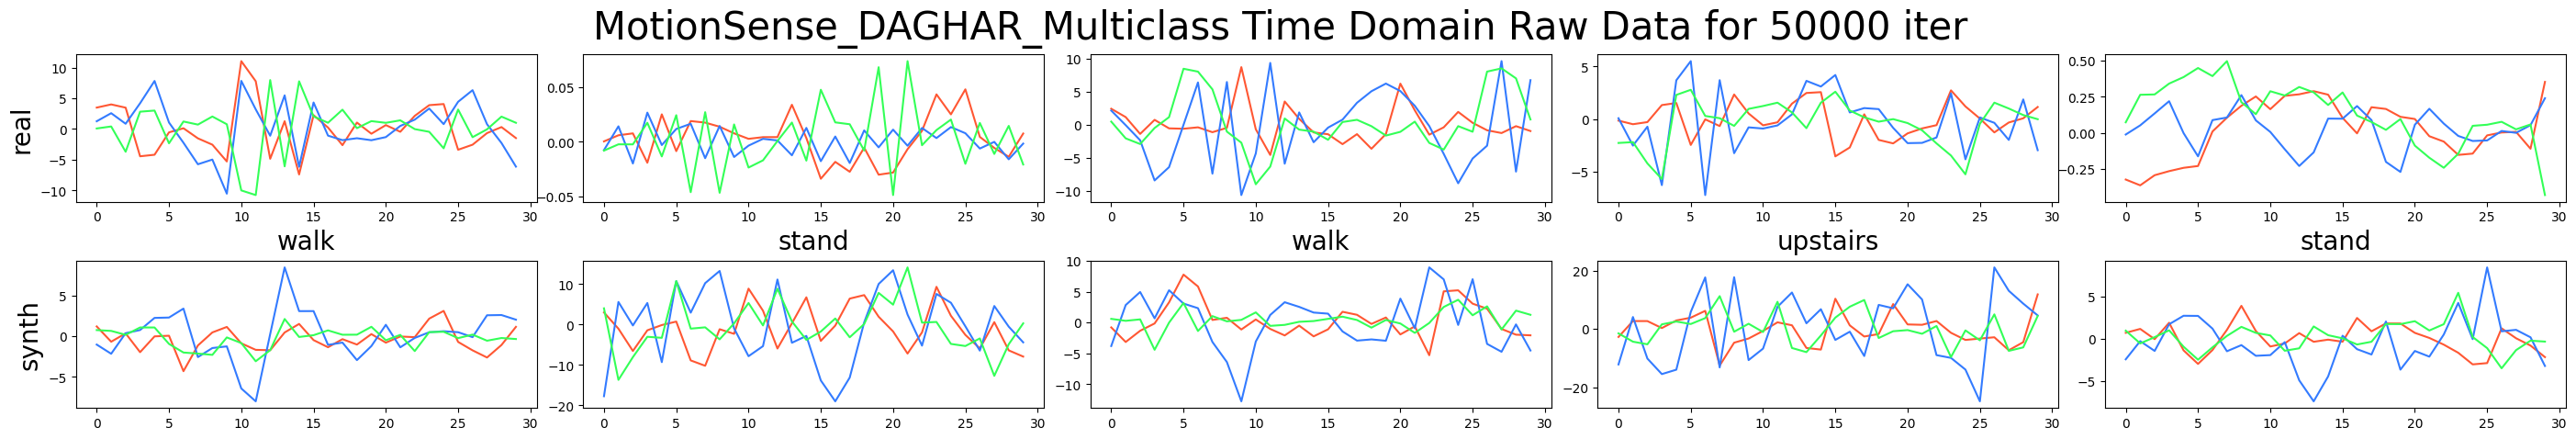

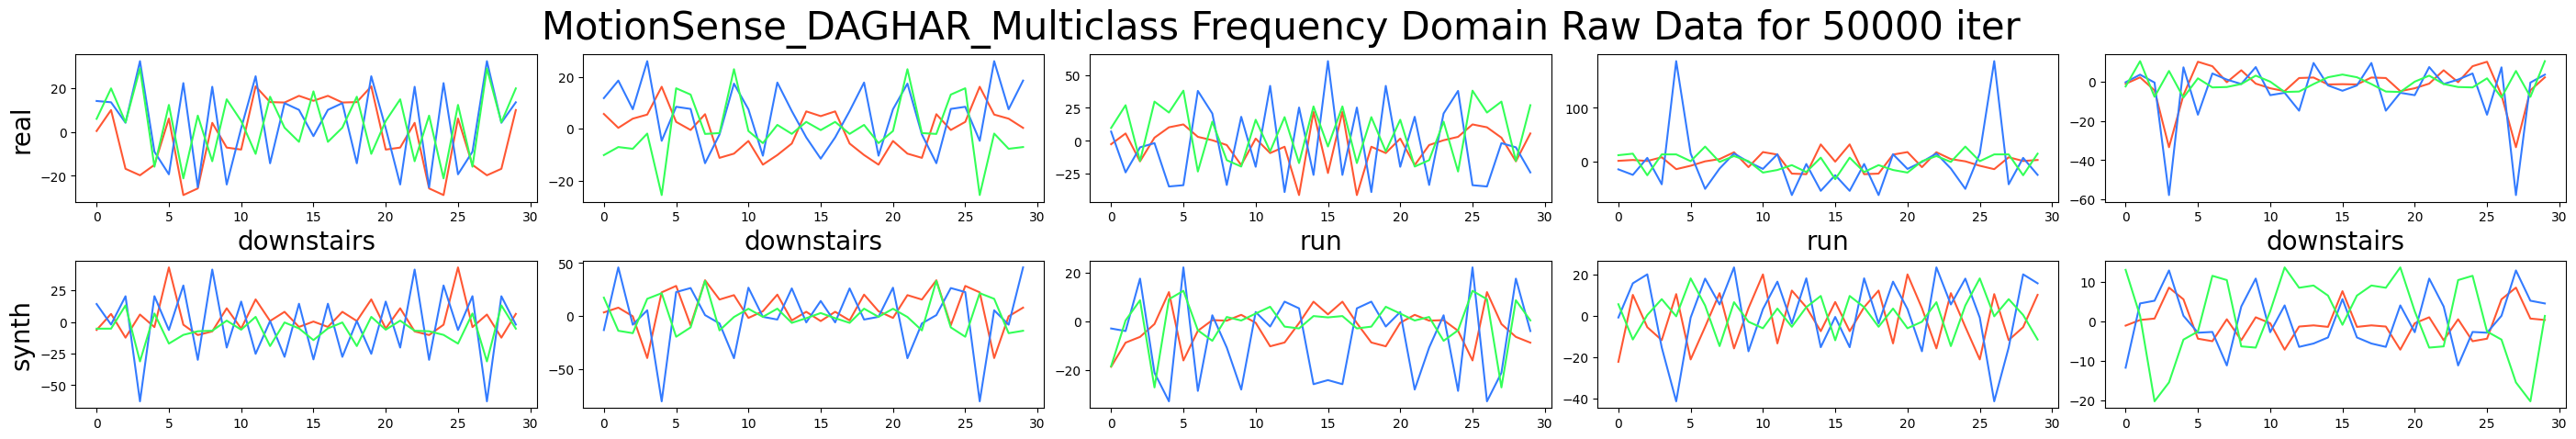

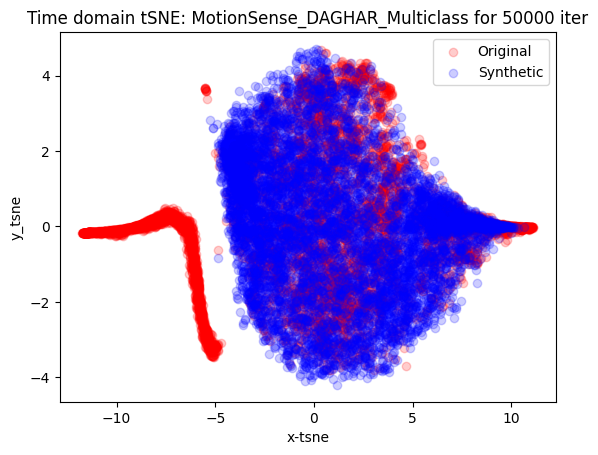

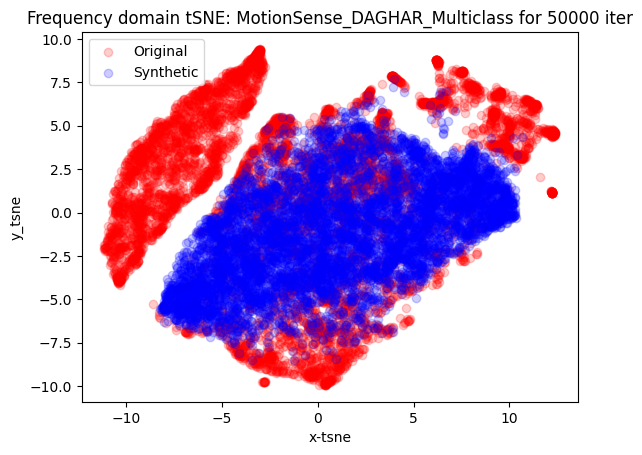

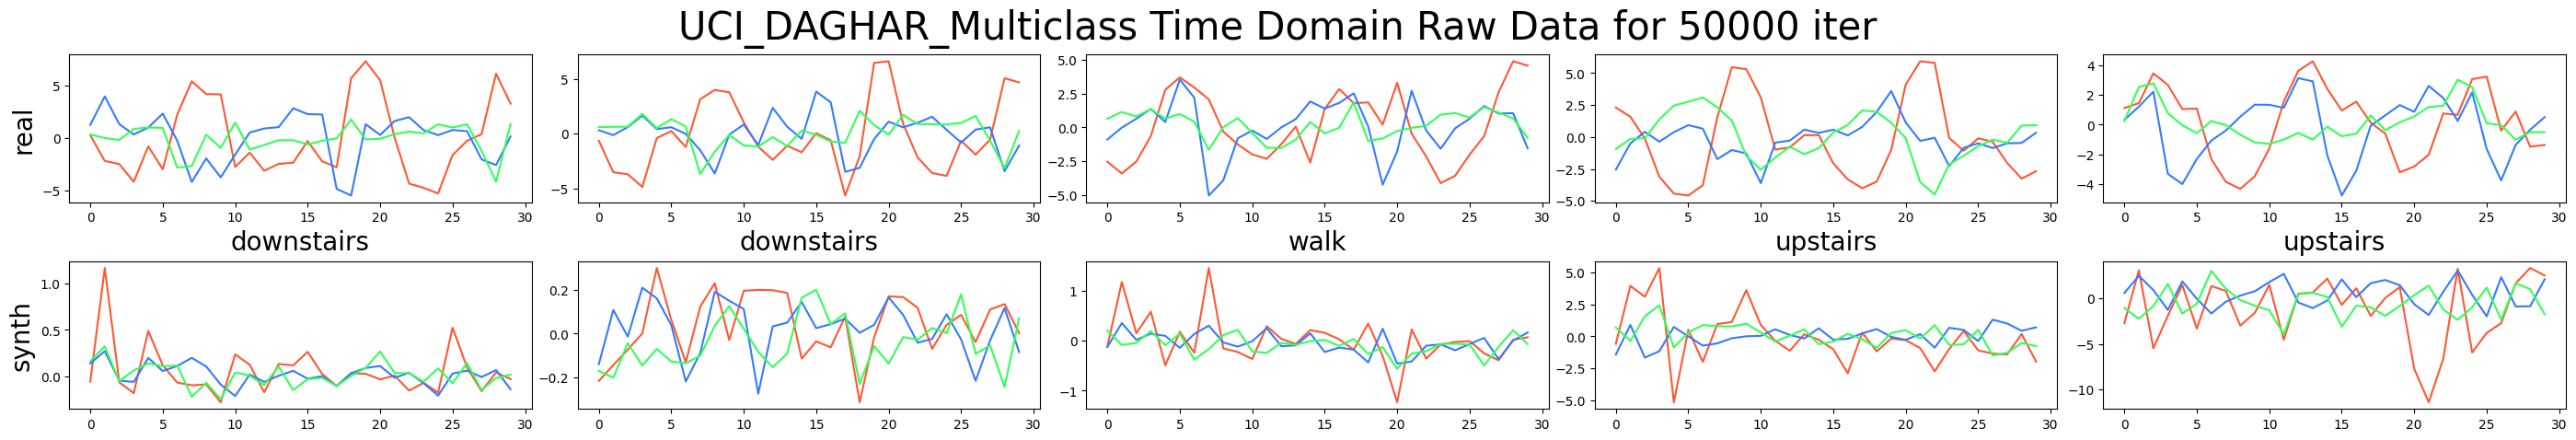

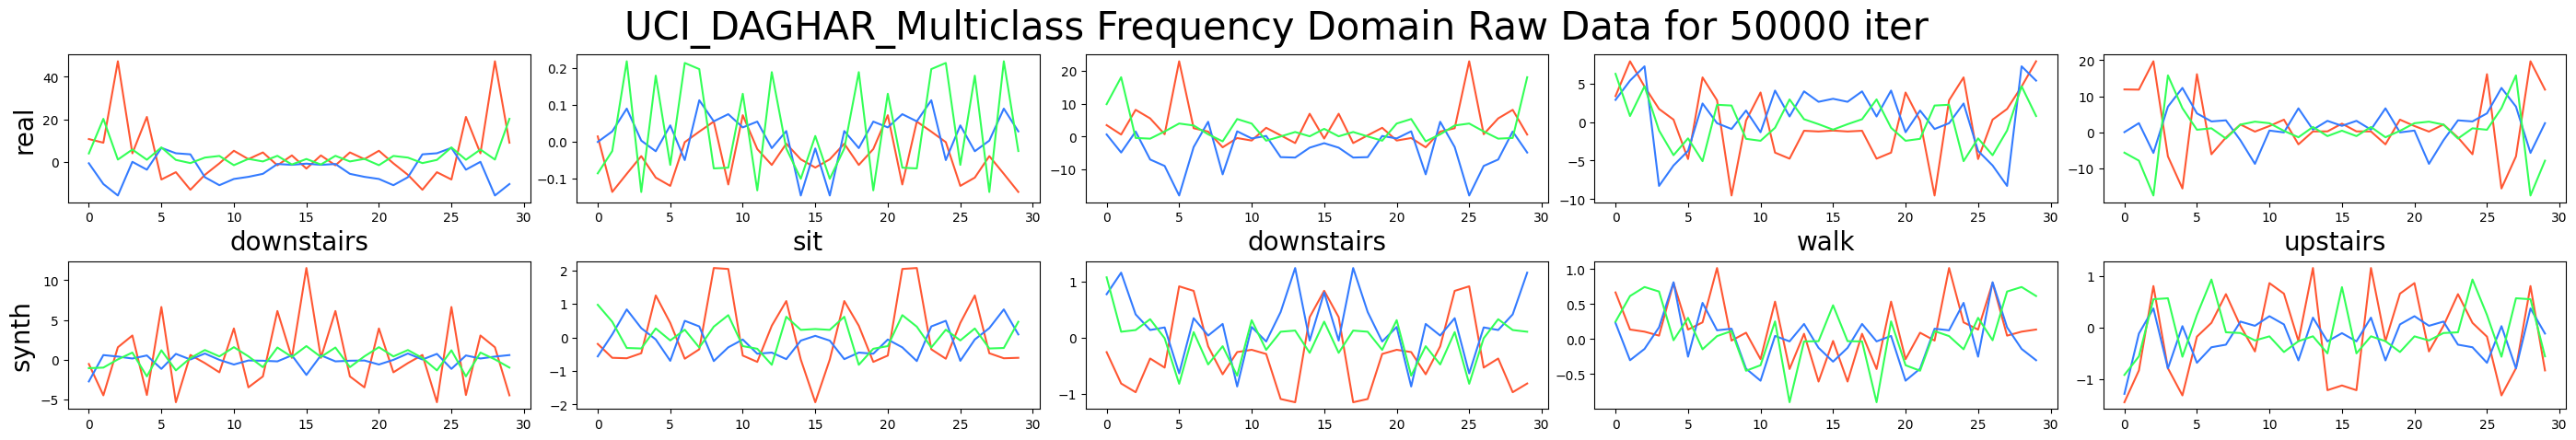

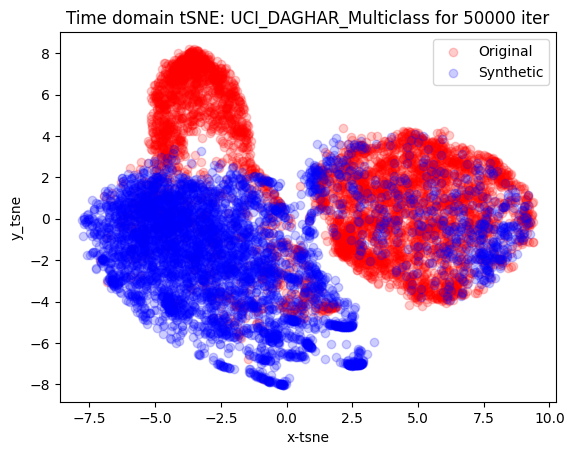

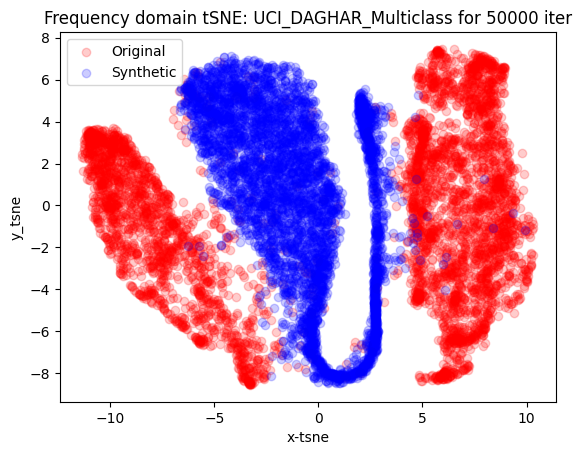

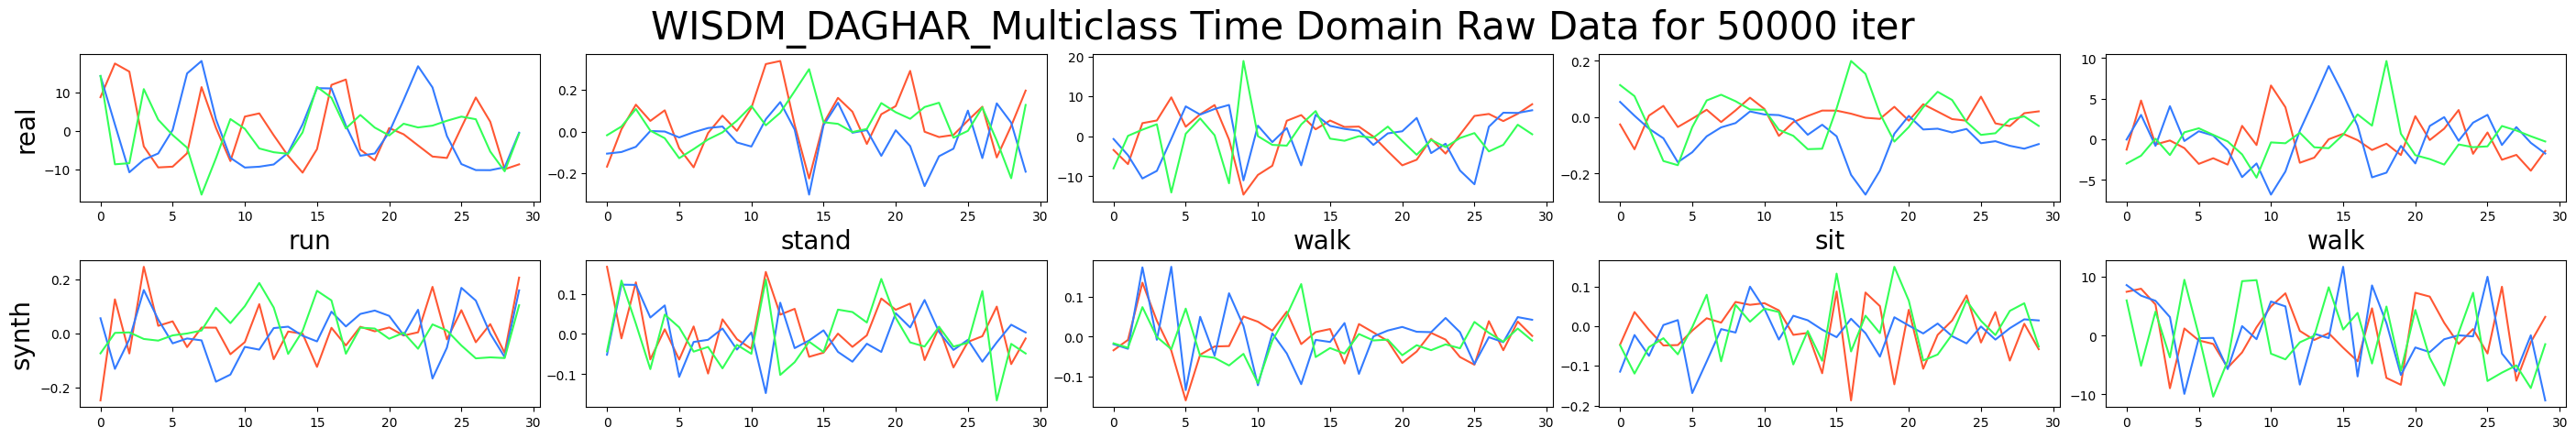

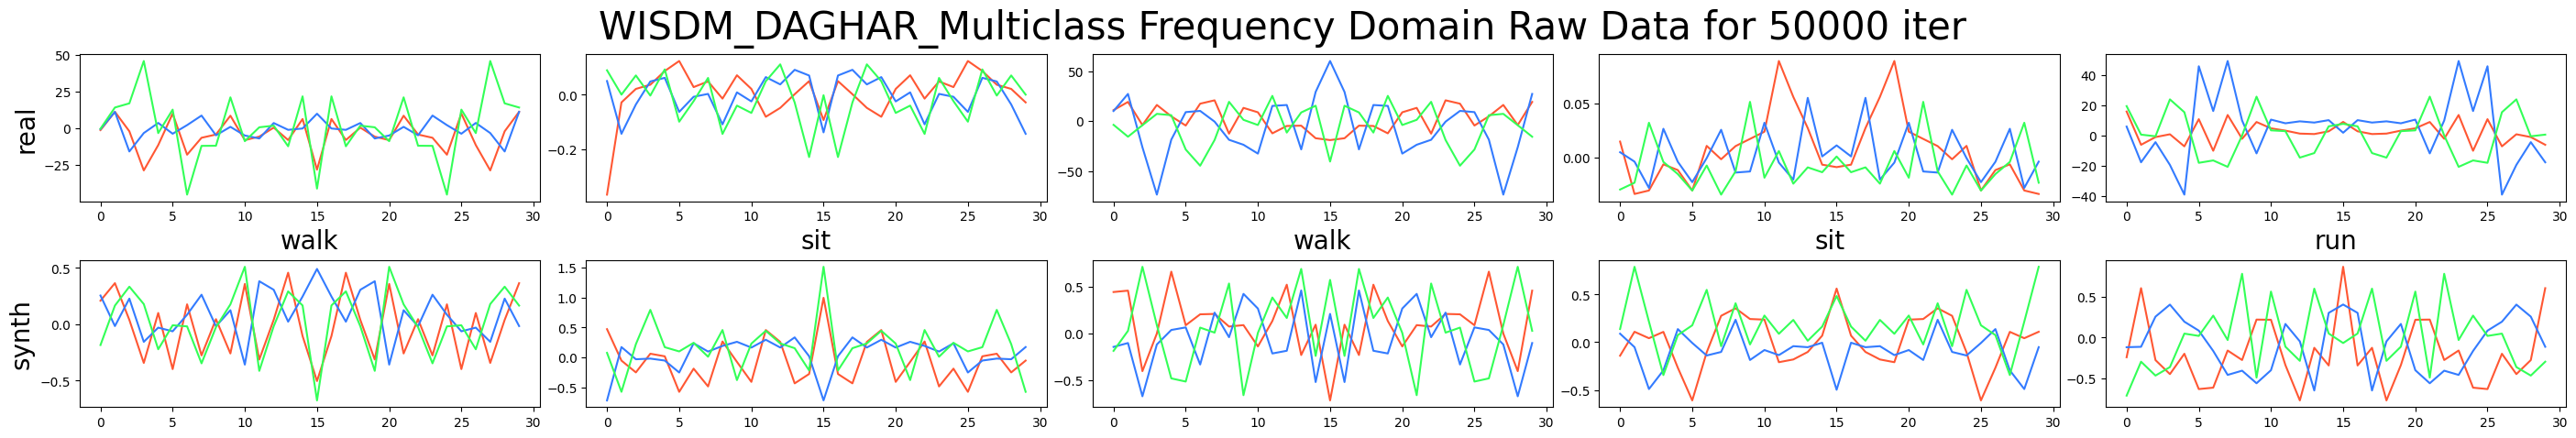

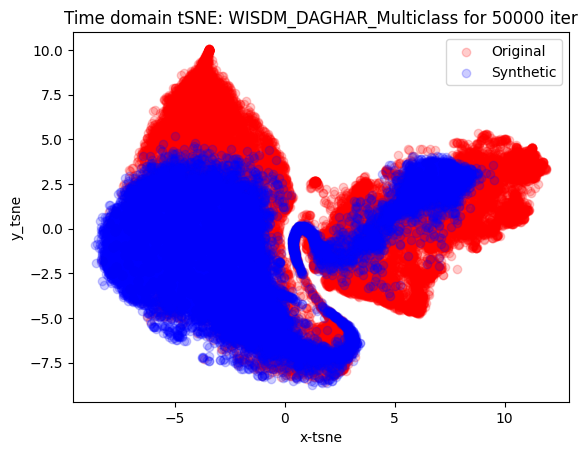

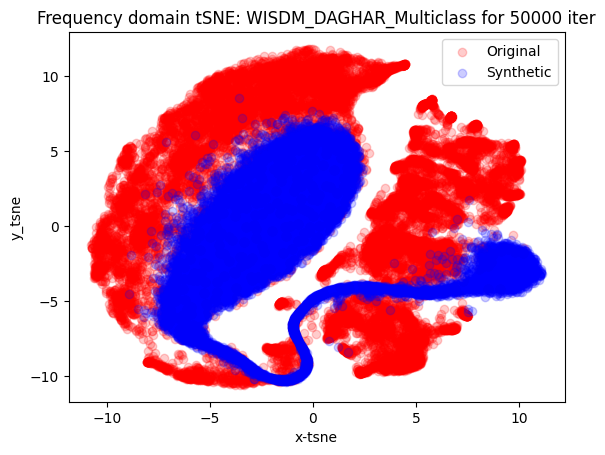

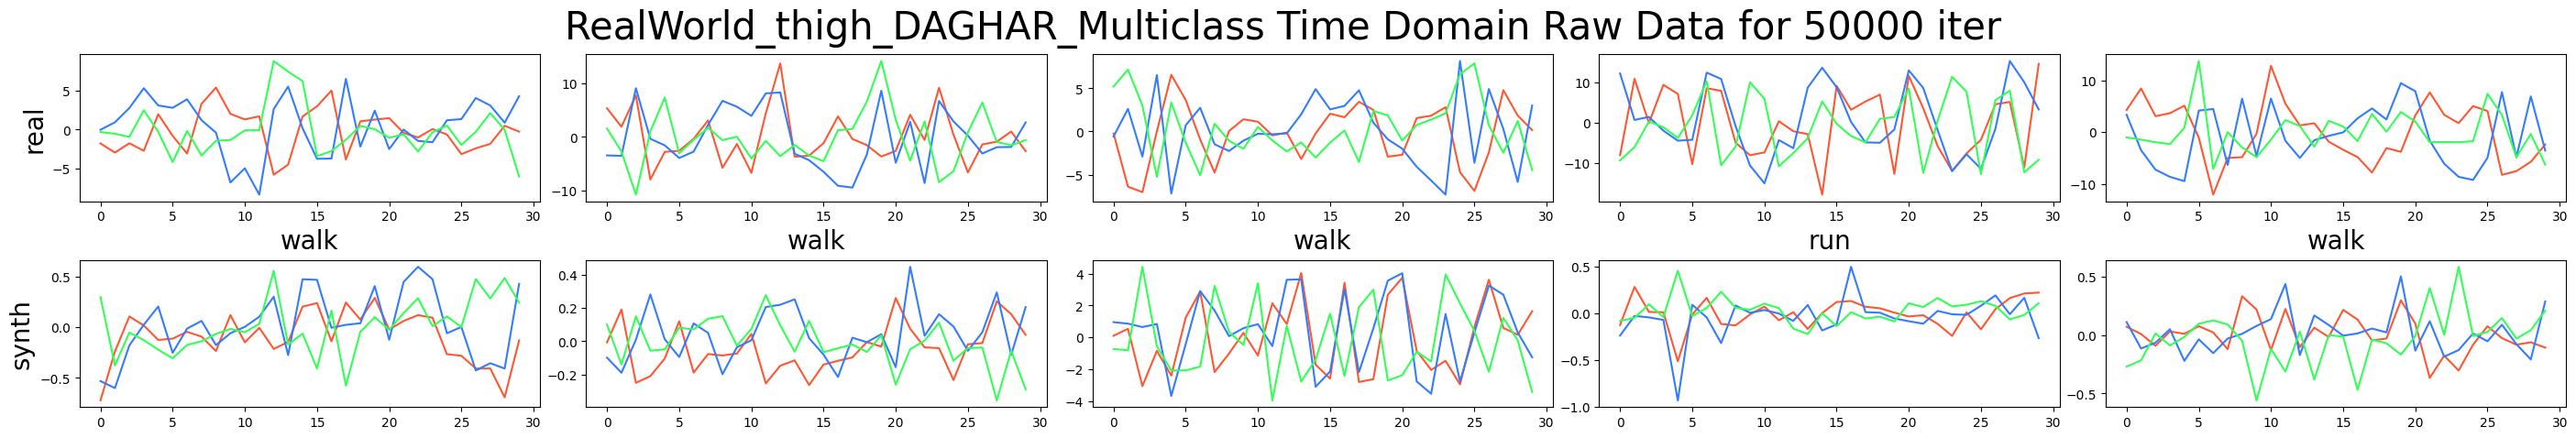

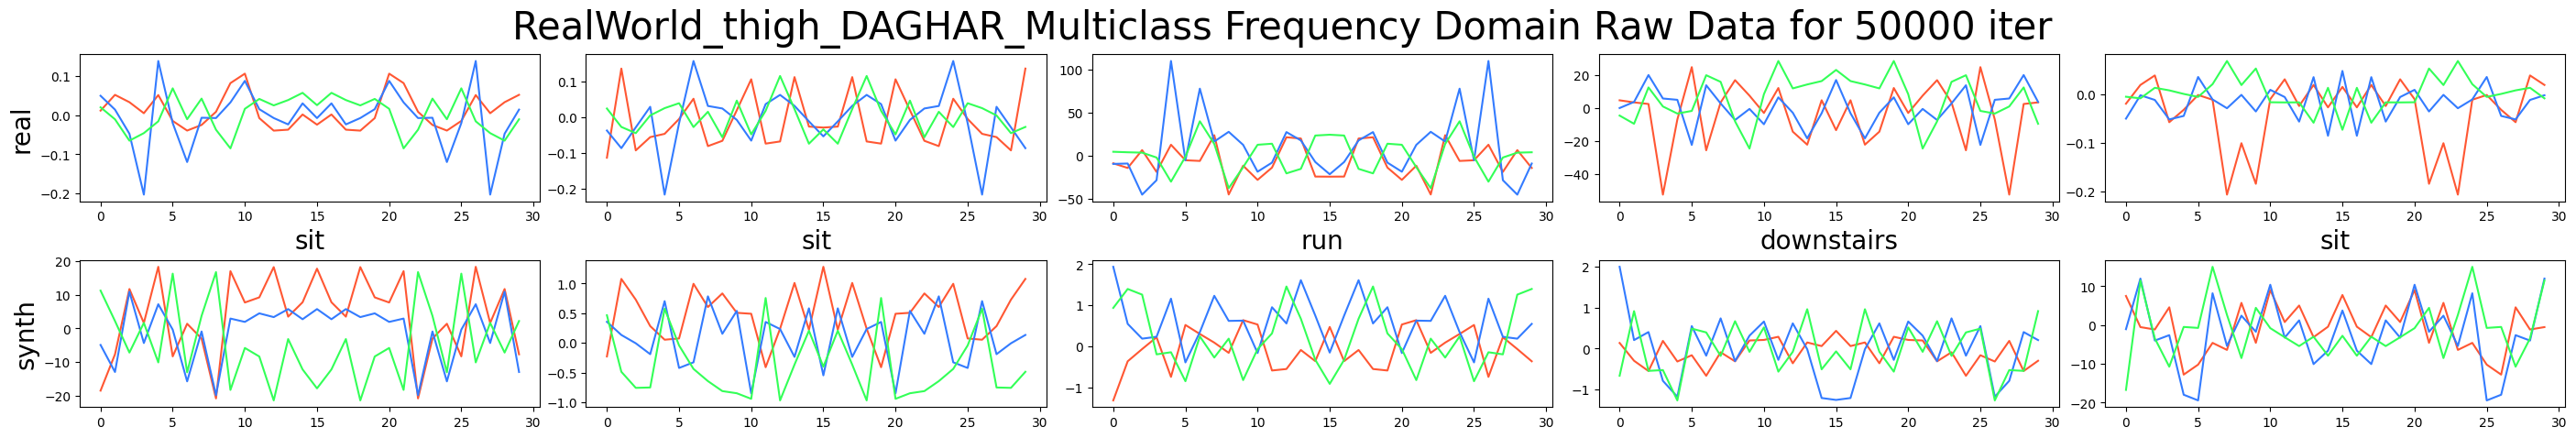

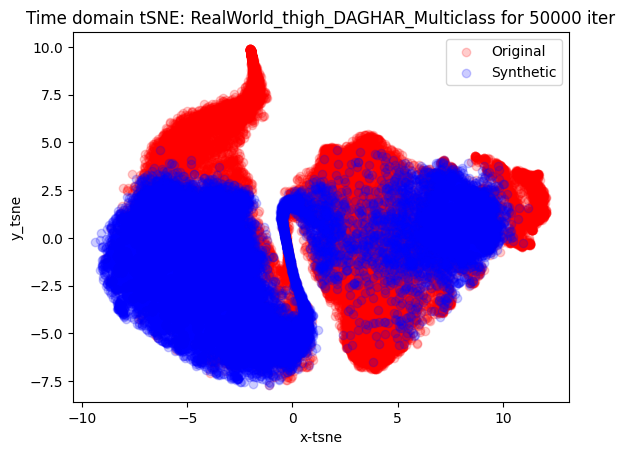

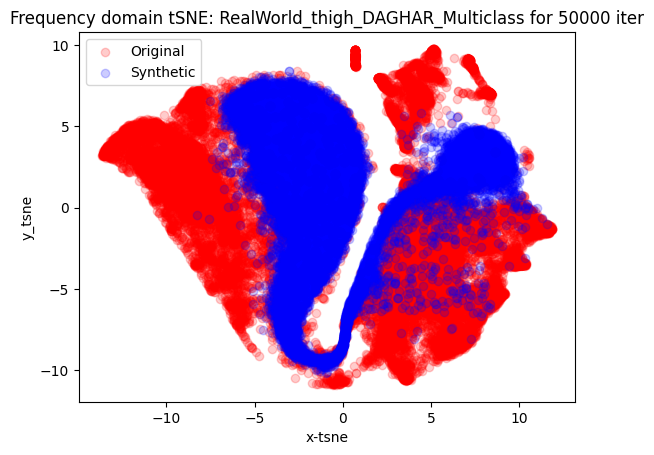

In [4]:
results = {}
synthetic = []
original = []
for i in range(len(class_names)):
    eval = DagharUniclassEvaluation(data_path=data_path + 'data/'+ class_names[i] + '.csv',
                                    label_path=data_path + 'label/' + label_paths[i] + '.csv',
                                    models_path= models_path + directorys[i] + '/Model/',
                                    class_name=class_names[i],
                                    seq_len=30,
                                    show=True,
                                    iter = 50000,
                                    sample_size='all',
                                    channels=3,
                                    n=1)
    print('-----------------------------------------------------------------------------')
    results[first_parts[i]] = (eval.dictionary)
    synthetic.append(eval.syn_data)
    original.append(eval.original_data)


print(results)

In [9]:
import shutil

#Copy files for easy access
synthetic_data_path = '../Notebooks/Daghar_TTSGAN_Synthetic_Data/'
temp = os.listdir(synthetic_data_path)
temp.remove('.samples')
for directory in temp:
    shutil.copyfile(synthetic_data_path + directory + '/samples/samples.npy',
                    synthetic_data_path + '.samples/' + directory + '.npy')

In [10]:
for d in temp:
    test = np.load(synthetic_data_path + '.samples/' + d + '.npy')
    print(test.shape)

(12854, 3, 30)
(12854, 3, 30)
(16260, 3, 30)
(16260, 3, 30)
(17228, 3, 30)
(17228, 3, 30)
(17228, 3, 30)


In [10]:
import pandas as pd

# Convertendo o dicionário de dicionários em um DataFrame
df = pd.DataFrame(results).T  # Transposta para ter as chaves como índice

# Separando as colunas de atividade e iteração
df['Activity'] = df.index.str.split('_').str[0]  # Primeira parte da string antes do primeiro underline
df['Iterations'] = df.index.str.split('_').str[1]  # Segunda parte (número de iterações)

# Reorganizando as colunas
df = df[['Activity', 'Iterations', 'Time', 'Frequency']].reset_index(drop=True)

df.style.set_table_styles([{'selector' : 'tr:hover', 'props' : [('bacground-color','purple'),('color','white')]}])
# Exibir o DataFrame resultante
df


Activity Iterations               Time          Frequency
0  motionsense     daghar  0.99577 ± 0.00000  0.83790 ± 0.00000
1          uci     daghar  0.98936 ± 0.00000  0.91089 ± 0.00000
2        wisdm     daghar  0.98247 ± 0.00000  0.88707 ± 0.00000
3    realworld      thigh  0.99385 ± 0.00000  0.81966 ± 0.00000
4    realworld      waist  0.98701 ± 0.00000  0.88841 ± 0.00000
5        kuhar     daghar  0.81164 ± 0.00000  0.81059 ± 0.00000

## TSNE for all data

In [40]:
def multiclass_TSNE_visualization(original, synthetic, classes, title = 't-SNE plot', random = None, show=True, s = True, o = True):
        '''

        Data original and synthetic is expected to be in shape (batch, timeframe, channel), for 
        example (600, 30, 3)

        '''
        n = len(original)
        l = len(original[0])
        c = [
            '#d62728',  # Vermelho
            '#17becf',  # Ciano
            '#ff7f0e',  # Laranja
            '#9467bd',  # Roxo
            '#2ca02c',  # Verde
            '#8c564b',  # Marrom
            '#bcbd22',  # Amarelo
            '#1f77b4',  # Azul
            '#e377c2',  # Rosa
            '#7f7f7f',  # Cinza
            '#ff9896',  # Salmão
            '#c5b0d5'   # Lavanda
        ]




        idx = np.random.permutation(l)

        no, dim, seq_len = original[0].shape  
        
        prep_data_final = []
        for j in range(n):
            # Data preprocessing
            ori = np.transpose(original[j], (0, 2, 1))
            syn = np.transpose(synthetic[j], (0, 2, 1))

            ori = np.asarray(ori)
            syn = np.asarray(syn) 

            #For complex values
            ori = np.abs(ori[idx])
            syn = np.abs(syn[idx])

            for i in range(l):
                if (i == 0):
                    prep = np.reshape(np.mean(ori[0,:,:], 1), [1, seq_len])
                    prep_hat = np.reshape(np.mean(syn[0,:,:], 1), [1, seq_len])

                else:
                    prep = np.concatenate((prep, np.reshape(np.mean(ori[i,:,:],1), [1, seq_len])))
                    prep_hat = np.concatenate((prep_hat, np.reshape(np.mean(syn[i,:,:],1), [1, seq_len])))
                
            data_temp = np.concatenate((prep, prep_hat), axis = 0)

            if len(prep_data_final) != 0:
                prep_data_final = np.concatenate((prep_data_final, data_temp), axis = 0)
            else:
                prep_data_final = data_temp

        
        #print(prep_data_final.shape)
        # Do t-SNE Analysis together 
        # TSNE anlaysis
        tsne = TSNE(n_components = 2, verbose = 0, perplexity = 40, n_iter = 300)
        tsne_results = tsne.fit_transform(prep_data_final)
        print(tsne_results.shape)
        # Plotting
        if not show:
            return tsne_results
        
        f, ax = plt.subplots(1)

        for k in range(n):
            print(f'index vão de: {l*(k*2)} até {l*((k*2)+1)} para o real e de {l*((k*2)+1)} até {l*((k*2)+2)} para o sintético')
            print(f'k: {k}, l: {l}')
            #print(f'tsne x original{tsne_results[l*k:l*(k+1),0]}, tsne y original {tsne_results[l*k:l*(k+1),1]}')
            if o:
                plt.scatter(tsne_results[l*(k*2):l*((k*2)+1),0], tsne_results[l*(k*2):l*((k*2)+1),1], 
                            c = c[k], alpha = 0.2, label = f"{classes[k]} Original")
            #print(f'tsne x original{tsne_results[l*(k+1):l*(k+2),0]}, tsne y original {tsne_results[l*(k+1):l*(k+2),1]}')
            if s:
                plt.scatter(tsne_results[l*((k*2)+1):l*((k*2)+2),0], tsne_results[l*((k*2)+1):l*((k*2)+2),1], 
                            c = c[k+n], alpha = 0.2, label = f"{classes[k]} Synthetic")

        ax.legend()

        plt.title(title)
        plt.xlabel('x-tsne')
        plt.ylabel('y_tsne')
        plt.show()

        return tsne_results

(7200, 2)
index vão de: 0 até 600 para o real e de 600 até 1200 para o sintético
k: 0, l: 600
index vão de: 1200 até 1800 para o real e de 1800 até 2400 para o sintético
k: 1, l: 600
index vão de: 2400 até 3000 para o real e de 3000 até 3600 para o sintético
k: 2, l: 600
index vão de: 3600 até 4200 para o real e de 4200 até 4800 para o sintético
k: 3, l: 600
index vão de: 4800 até 5400 para o real e de 5400 até 6000 para o sintético
k: 4, l: 600
index vão de: 6000 até 6600 para o real e de 6600 até 7200 para o sintético
k: 5, l: 600


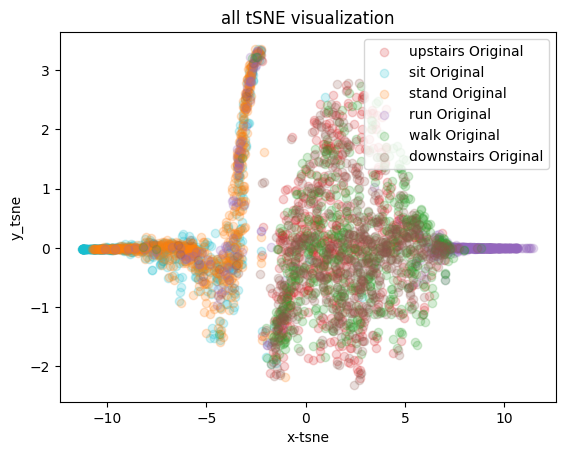

(7200, 2)
index vão de: 0 até 600 para o real e de 600 até 1200 para o sintético
k: 0, l: 600
index vão de: 1200 até 1800 para o real e de 1800 até 2400 para o sintético
k: 1, l: 600
index vão de: 2400 até 3000 para o real e de 3000 até 3600 para o sintético
k: 2, l: 600
index vão de: 3600 até 4200 para o real e de 4200 até 4800 para o sintético
k: 3, l: 600
index vão de: 4800 até 5400 para o real e de 5400 até 6000 para o sintético
k: 4, l: 600
index vão de: 6000 até 6600 para o real e de 6600 até 7200 para o sintético
k: 5, l: 600


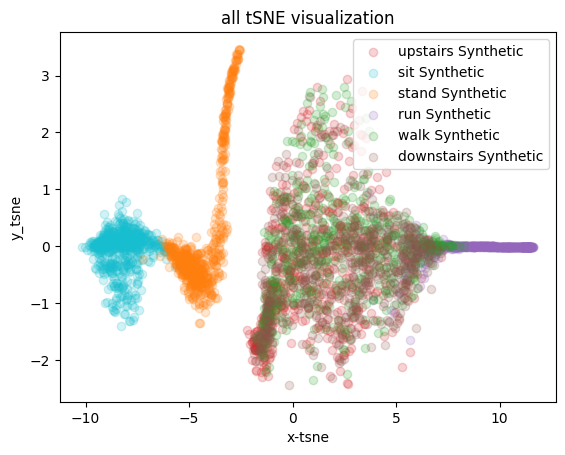

(7200, 2)
index vão de: 0 até 600 para o real e de 600 até 1200 para o sintético
k: 0, l: 600
index vão de: 1200 até 1800 para o real e de 1800 até 2400 para o sintético
k: 1, l: 600
index vão de: 2400 até 3000 para o real e de 3000 até 3600 para o sintético
k: 2, l: 600
index vão de: 3600 até 4200 para o real e de 4200 até 4800 para o sintético
k: 3, l: 600
index vão de: 4800 até 5400 para o real e de 5400 até 6000 para o sintético
k: 4, l: 600
index vão de: 6000 até 6600 para o real e de 6600 até 7200 para o sintético
k: 5, l: 600


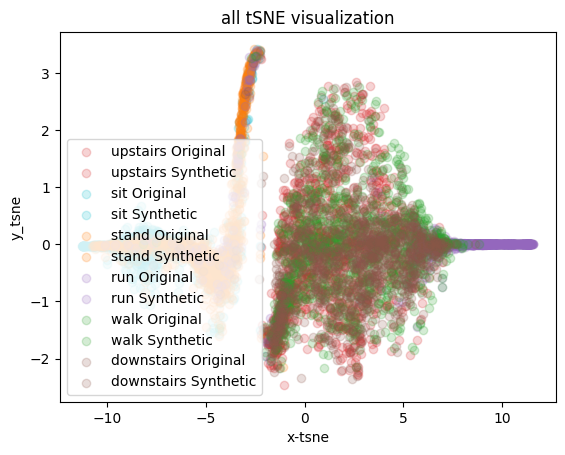

array([[-0.60493296, -0.69447607],
       [ 0.38746172,  1.1662134 ],
       [-0.4589203 ,  0.14596581],
       ...,
       [ 2.3763685 , -0.14821327],
       [ 1.1703113 ,  1.1529431 ],
       [ 2.4116921 , -1.5110921 ]], dtype=float32)

In [41]:
multiclass_TSNE_visualization(original, synthetic, class_names, title='all tSNE visualization', o=True, s = False)
multiclass_TSNE_visualization(original, synthetic, class_names, title='all tSNE visualization', o=False, s = True)
multiclass_TSNE_visualization(original, synthetic, class_names, title='all tSNE visualization', o=True, s = True)

## Encoder

In [42]:
running_model(torch.tensor(original_set[0:10][0], dtype=torch.float))

tensor([[0.5004],
        [0.7168],
        [0.8186],
        [0.8480],
        [0.6602],
        [0.7924],
        [0.5605],
        [0.5729],
        [0.5709],
        [0.7257]], grad_fn=<AddmmBackward0>)

In [ ]:
running_ckp['dis_state_dict'].keys()

In [43]:
keys_to_remove = list(running_ckp['dis_state_dict'].keys())[-4:]  # Obtém as últimas 4 chaves

# Remove as chaves do dicionário original
for key in keys_to_remove:
    del running_ckp['dis_state_dict'][key]

# Verificando o resultado
print(running_ckp['dis_state_dict'].keys())

odict_keys(['0.cls_token', '0.positions', '0.projection.1.weight', '0.projection.1.bias', '1.0.0.fn.0.weight', '1.0.0.fn.0.bias', '1.0.0.fn.1.keys.weight', '1.0.0.fn.1.keys.bias', '1.0.0.fn.1.queries.weight', '1.0.0.fn.1.queries.bias', '1.0.0.fn.1.values.weight', '1.0.0.fn.1.values.bias', '1.0.0.fn.1.projection.weight', '1.0.0.fn.1.projection.bias', '1.0.1.fn.0.weight', '1.0.1.fn.0.bias', '1.0.1.fn.1.0.weight', '1.0.1.fn.1.0.bias', '1.0.1.fn.1.3.weight', '1.0.1.fn.1.3.bias', '1.1.0.fn.0.weight', '1.1.0.fn.0.bias', '1.1.0.fn.1.keys.weight', '1.1.0.fn.1.keys.bias', '1.1.0.fn.1.queries.weight', '1.1.0.fn.1.queries.bias', '1.1.0.fn.1.values.weight', '1.1.0.fn.1.values.bias', '1.1.0.fn.1.projection.weight', '1.1.0.fn.1.projection.bias', '1.1.1.fn.0.weight', '1.1.1.fn.0.bias', '1.1.1.fn.1.0.weight', '1.1.1.fn.1.0.bias', '1.1.1.fn.1.3.weight', '1.1.1.fn.1.3.bias', '1.2.0.fn.0.weight', '1.2.0.fn.0.bias', '1.2.0.fn.1.keys.weight', '1.2.0.fn.1.keys.bias', '1.2.0.fn.1.queries.weight', '1.2.0.fn.1

In [44]:
class Encoder(nn.Sequential):
    def __init__(self, 
                 in_channels=3,
                 patch_size=15,
                 emb_size=50, 
                 seq_len = 150,
                 depth=3, 
                 n_classes=1, 
                 **kwargs):
        super().__init__(
            PatchEmbedding_Linear(in_channels, patch_size, emb_size, seq_len),
            Dis_TransformerEncoder(depth, emb_size=emb_size, drop_p=0.5, forward_drop_p=0.5, **kwargs)
        )

In [45]:
encoder = Encoder(in_channels=3, seq_len=30)
encoder

Encoder(
  (0): PatchEmbedding_Linear(
    (projection): Sequential(
      (0): Rearrange('b c (h s1) (w s2) -> b (h w) (s1 s2 c)', s1=1, s2=15)
      (1): Linear(in_features=45, out_features=50, bias=True)
    )
  )
  (1): Dis_TransformerEncoder(
    (0): Dis_TransformerEncoderBlock(
      (0): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1): MultiHeadAttention(
            (keys): Linear(in_features=50, out_features=50, bias=True)
            (queries): Linear(in_features=50, out_features=50, bias=True)
            (values): Linear(in_features=50, out_features=50, bias=True)
            (att_drop): Dropout(p=0.5, inplace=False)
            (projection): Linear(in_features=50, out_features=50, bias=True)
          )
          (2): Dropout(p=0.5, inplace=False)
        )
      )
      (1): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1): Feed

In [47]:
encoder.load_state_dict(running_ckp['dis_state_dict'])
encoder

Encoder(
  (0): PatchEmbedding_Linear(
    (projection): Sequential(
      (0): Rearrange('b c (h s1) (w s2) -> b (h w) (s1 s2 c)', s1=1, s2=15)
      (1): Linear(in_features=45, out_features=50, bias=True)
    )
  )
  (1): Dis_TransformerEncoder(
    (0): Dis_TransformerEncoderBlock(
      (0): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1): MultiHeadAttention(
            (keys): Linear(in_features=50, out_features=50, bias=True)
            (queries): Linear(in_features=50, out_features=50, bias=True)
            (values): Linear(in_features=50, out_features=50, bias=True)
            (att_drop): Dropout(p=0.5, inplace=False)
            (projection): Linear(in_features=50, out_features=50, bias=True)
          )
          (2): Dropout(p=0.5, inplace=False)
        )
      )
      (1): ResidualAdd(
        (fn): Sequential(
          (0): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
          (1): Feed

In [50]:
encoder(torch.tensor(original_set[0:11][0], dtype=torch.float)).shape

torch.Size([11, 3, 50])